In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../../NRD 2013 (machine learning).csv")
df.head()

,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,...,_Iage_group_1,_Iage_group_2,_Inew_cc_in_1,_Inew_cc_in_2,_Ipayer_2,_Ipayer_3,_Ipayer_4,_Izipinc_qr_2,_Izipinc_qr_3,_Izipinc_qr_4
0,0,89,1,0.0,1.071937,5.0,3,1,372,30,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,1,89,1,0.0,1.071937,1.0,6,2,853,30,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
2,2,89,0,0.0,1.071937,5.0,9,3,853,30,...,0,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,48,0,0.0,3.063669,1.0,6,2,330,30,...,1,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,65,0,0.0,1.919980,1.0,5,2,387,30,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
# List all of the column names
print(df.columns.values)

['index' 'age' 'aweekend' 'died' 'discwt' 'dispuniform' 'dmonth' 'dqtr'
 'drg' 'drgver' 'drg_nopoa' 'dx1' 'dx2' 'dx3' 'dx4' 'dx5' 'dx6' 'dx7'
 'dx8' 'dx9' 'dx10' 'dx11' 'dx12' 'dx13' 'dx14' 'dx15' 'dx16' 'dx17'
 'dx18' 'dx19' 'dx20' 'dx21' 'dx22' 'dx23' 'dx24' 'dx25' 'dxccs1' 'dxccs2'
 'dxccs3' 'dxccs4' 'dxccs5' 'dxccs6' 'dxccs7' 'dxccs8' 'dxccs9' 'dxccs10'
 'dxccs11' 'dxccs12' 'dxccs13' 'dxccs14' 'dxccs15' 'dxccs16' 'dxccs17'
 'dxccs18' 'dxccs19' 'dxccs20' 'dxccs21' 'dxccs22' 'dxccs23' 'dxccs24'
 'dxccs25' 'elective' 'female' 'hcup_ed' 'hosp_nrd' 'key_nrd' 'los' 'mdc'
 'mdc_nopoa' 'nchronic' 'ndx' 'necode' 'npr' 'nrd_daystoevent'
 'nrd_stratum' 'nrd_visitlink' 'orproc' 'pay1' 'pl_nchs' 'pr1' 'pr2' 'pr3'
 'pr4' 'pr5' 'pr6' 'pr7' 'pr8' 'pr9' 'pr10' 'pr11' 'pr12' 'pr13' 'pr14'
 'pr15' 'prccs1' 'prccs2' 'prccs3' 'prccs4' 'prccs5' 'prccs6' 'prccs7'
 'prccs8' 'prccs9' 'prccs10' 'prccs11' 'prccs12' 'prccs13' 'prccs14'
 'prccs15' 'rehabtransfer' 'resident' 'samedayevent' 'totchg' 'year'
 'zip

In [4]:
# Check the top rows
df.head()

,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,...,_Iage_group_1,_Iage_group_2,_Inew_cc_in_1,_Inew_cc_in_2,_Ipayer_2,_Ipayer_3,_Ipayer_4,_Izipinc_qr_2,_Izipinc_qr_3,_Izipinc_qr_4
0,0,89,1,0.0,1.071937,5.0,3,1,372,30,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,1,89,1,0.0,1.071937,1.0,6,2,853,30,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
2,2,89,0,0.0,1.071937,5.0,9,3,853,30,...,0,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,48,0,0.0,3.063669,1.0,6,2,330,30,...,1,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,65,0,0.0,1.919980,1.0,5,2,387,30,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
# Make a copy of the dataframe
df_copy = df.copy()

In [6]:
# Check the back end of the data
df_copy.tail()

,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,...,_Iage_group_1,_Iage_group_2,_Inew_cc_in_1,_Inew_cc_in_2,_Ipayer_2,_Ipayer_3,_Ipayer_4,_Izipinc_qr_2,_Izipinc_qr_3,_Izipinc_qr_4
94493,94493,44,0,0.0,1.669010,6.0,6,2,331,30,...,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0
94494,94494,44,0,0.0,1.669010,1.0,8,3,346,30,...,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0
94495,94495,44,0,0.0,1.669010,1.0,8,3,393,30,...,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0
94496,94496,52,0,0.0,1.863343,1.0,2,1,472,30,...,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
94497,94497,72,1,0.0,1.771707,1.0,2,1,385,30,...,0,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
df_copy[['nrd_visitlink','ibd_index_hosp', 'dx1', 'new_mi_adm', 'ibd_readm']].head(25)

,nrd_visitlink,ibd_index_hosp,dx1,new_mi_adm,ibd_readm
0,00017u,1,00845,0,0
1,00017u,0,0389,0,1
2,00017u,0,03842,0,1
3,0004o5,1,5559,0,0
4,000dbz,1,5559,0,0
5,000dbz,0,42731,0,1
6,000dbz,0,5559,0,1
7,000dbz,0,5552,0,1
8,000dbz,0,99859,0,1
9,000mgu,1,55221,0,0


In [8]:
# Recoding the ibd_readm outcome variable
readm_set = set()
for index, row in df_copy[['nrd_visitlink','ibd_readm']].iterrows():
    if row[1] == 1:
        readm_set.add(row[0])
        
readm_list = list(readm_set)

df_copy.loc[df_copy.nrd_visitlink.isin(readm_list), 'ibd_readm'] = '1'
df_copy[['nrd_visitlink','ibd_index_hosp', 'ibd_readm']].head(25)

,nrd_visitlink,ibd_index_hosp,ibd_readm
0,00017u,1,1
1,00017u,0,1
2,00017u,0,1
3,0004o5,1,0
4,000dbz,1,1
5,000dbz,0,1
6,000dbz,0,1
7,000dbz,0,1
8,000dbz,0,1
9,000mgu,1,0


In [9]:
df_copy[['nrd_visitlink', 'pay1', 'ibd_index_hosp', 'ibd_readm']].head(25)

,nrd_visitlink,pay1,ibd_index_hosp,ibd_readm
0,00017u,1.0,1,1
1,00017u,1.0,0,1
2,00017u,1.0,0,1
3,0004o5,3.0,1,0
4,000dbz,1.0,1,1
5,000dbz,1.0,0,1
6,000dbz,1.0,0,1
7,000dbz,1.0,0,1
8,000dbz,1.0,0,1
9,000mgu,3.0,1,0


In [10]:
# Number of index hospitalizations
index_hosp_counts = df_copy['ibd_index_hosp'].value_counts()
index_hosp_counts

1    47402
0    47096
Name: ibd_index_hosp, dtype: int64

In [11]:
# Number of readmissions within six months
readm_counts = df_copy['ibd_readm'].value_counts()
readm_counts

1    64373
0    30125
Name: ibd_readm, dtype: int64

In [12]:
# Filter the data so that only patients with an index hospitalizations are in a DataFrame
readm_data_df = df_copy.loc[df_copy["ibd_index_hosp"] == 1, :]

# Check to ensure the filter worked correctly
readm_data_df["ibd_index_hosp"].count()

47402

In [13]:
print(readm_data_df.columns.values)

['index' 'age' 'aweekend' 'died' 'discwt' 'dispuniform' 'dmonth' 'dqtr'
 'drg' 'drgver' 'drg_nopoa' 'dx1' 'dx2' 'dx3' 'dx4' 'dx5' 'dx6' 'dx7'
 'dx8' 'dx9' 'dx10' 'dx11' 'dx12' 'dx13' 'dx14' 'dx15' 'dx16' 'dx17'
 'dx18' 'dx19' 'dx20' 'dx21' 'dx22' 'dx23' 'dx24' 'dx25' 'dxccs1' 'dxccs2'
 'dxccs3' 'dxccs4' 'dxccs5' 'dxccs6' 'dxccs7' 'dxccs8' 'dxccs9' 'dxccs10'
 'dxccs11' 'dxccs12' 'dxccs13' 'dxccs14' 'dxccs15' 'dxccs16' 'dxccs17'
 'dxccs18' 'dxccs19' 'dxccs20' 'dxccs21' 'dxccs22' 'dxccs23' 'dxccs24'
 'dxccs25' 'elective' 'female' 'hcup_ed' 'hosp_nrd' 'key_nrd' 'los' 'mdc'
 'mdc_nopoa' 'nchronic' 'ndx' 'necode' 'npr' 'nrd_daystoevent'
 'nrd_stratum' 'nrd_visitlink' 'orproc' 'pay1' 'pl_nchs' 'pr1' 'pr2' 'pr3'
 'pr4' 'pr5' 'pr6' 'pr7' 'pr8' 'pr9' 'pr10' 'pr11' 'pr12' 'pr13' 'pr14'
 'pr15' 'prccs1' 'prccs2' 'prccs3' 'prccs4' 'prccs5' 'prccs6' 'prccs7'
 'prccs8' 'prccs9' 'prccs10' 'prccs11' 'prccs12' 'prccs13' 'prccs14'
 'prccs15' 'rehabtransfer' 'resident' 'samedayevent' 'totchg' 'year'
 'zip

In [14]:
# List of all the variables in the dataset
['age',
 'female',
 'los',
 'aweekend',
 'elective',
 'orproc',
 'hosp_urban_rural_location',
 'payer',
 'zipinc_qrtl',
 'severe_IBD_hospitalization',
 'cm_aids',
 'cm_alcohol',
 'cm_anemdef',
 'cm_arth',
 'cm_bldloss',
 'cm_chf',
 'cm_chrnlung',
 'cm_depress',
 'cm_coag',
 'cm_dm',
 'cm_dmcx',
 'cm_drug',
 'cm_htn_c',
 'cm_hypothy',
 'cm_liver',
 'cm_lymph',
 'cm_lytes',
 'cm_mets',
 'cm_neuro',
 'cm_obese',
 'cm_para',
 'cm_perivasc',
 'cm_psych',
 'cm_pulmcirc',
 'cm_renlfail',
 'cm_tumor',
 'cm_ulcer',
 'cm_valve',
 'cm_wghtloss',
 'diabetes',
 'copd',
 'cm_smoking',
 'blood_transfusion',
 'ibd_procedures',
 'cc_index',
 'new_cc_index',
 'fractures',
 'thromboses',
 'unplanned_adm',
 'pq1_dm_short',
 'pq2_perf_appendix',
 'pq3_dm_long',
 'pq5_copd_asthma',
 'pq7_htn',
 'pq8_chf',
 'pq10_dehydrate',
 'pq11_bacterialpna',
 'pq12_uti',
 'pq13_angina',
 'pq14_diabeteswocomp',
 'pq15_asthma',
 'pq16_dm_amputate',
 'new_mi_adm',
 'new_chf_adm',
 'new_unstableangina_adm',
 'new_arrhythmia_adm',
 'new_cardiacarrest_adm',
 'new_meningitis_adm',
 'new_encephalitis_adm',
 'new_endocarditis_adm',
 'new_pneumonia_adm',
 'new_pyelonephritis_adm',
 'new_osteo_adm',
 'new_septicemia_adm',
 'new_cdiff_adm',
 'new_tb_adm',
 'new_atypicalmyco_adm',
 'new_fungal_adm',
 'new_listeriosis_adm',
 'new_leishmaniasis_adm',
 'new_pcp_adm',
 'chronic_pain',
 'ibd_surgery_adm',
 'frailty_risk_score',
 'frailty_risk_category',
 'frailty_risk_category_index',
 'h_contrl',
 'hosp_bedsize',
 'hosp_ur_teach',
 'hosp_urcat4',
 'prevent_readm',
 'cardiac_adm',
 'cvd_adm',
 'resp_adm',
 'infxn_adm',
 'gu_adm',
 'gi_adm',
 'endo_adm',
 'neuro_adm',
 'malignancies_adm',
 'fracture_adm',
 'thrombosis_adm',
 'ibd_specific_adm',
 'others_adm']

['age',
 'female',
 'los',
 'aweekend',
 'elective',
 'orproc',
 'hosp_urban_rural_location',
 'payer',
 'zipinc_qrtl',
 'severe_IBD_hospitalization',
 'cm_aids',
 'cm_alcohol',
 'cm_anemdef',
 'cm_arth',
 'cm_bldloss',
 'cm_chf',
 'cm_chrnlung',
 'cm_depress',
 'cm_coag',
 'cm_dm',
 'cm_dmcx',
 'cm_drug',
 'cm_htn_c',
 'cm_hypothy',
 'cm_liver',
 'cm_lymph',
 'cm_lytes',
 'cm_mets',
 'cm_neuro',
 'cm_obese',
 'cm_para',
 'cm_perivasc',
 'cm_psych',
 'cm_pulmcirc',
 'cm_renlfail',
 'cm_tumor',
 'cm_ulcer',
 'cm_valve',
 'cm_wghtloss',
 'diabetes',
 'copd',
 'cm_smoking',
 'blood_transfusion',
 'ibd_procedures',
 'cc_index',
 'new_cc_index',
 'fractures',
 'thromboses',
 'unplanned_adm',
 'pq1_dm_short',
 'pq2_perf_appendix',
 'pq3_dm_long',
 'pq5_copd_asthma',
 'pq7_htn',
 'pq8_chf',
 'pq10_dehydrate',
 'pq11_bacterialpna',
 'pq12_uti',
 'pq13_angina',
 'pq14_diabeteswocomp',
 'pq15_asthma',
 'pq16_dm_amputate',
 'new_mi_adm',
 'new_chf_adm',
 'new_unstableangina_adm',
 'new_arrhythmia

In [318]:
# Grab the features
data = readm_data_df[['ibd_readm','age', 'frailty_risk_score', 'los', 'zipinc_qrtl', 'payer', 'hosp_bedsize', 'h_contrl', 'hosp_urcat4', 'hosp_ur_teach', 'cc_index', 'female', 'cm_htn_c', 'ibd_procedures', 'cm_smoking', 'aweekend', 'ibd_specific_adm', 'diabetes', 'cm_depress', 'orproc', 'thromboses'
 ]]

cleaned_data = data.dropna(axis='rows')
cleaned_data

,ibd_readm,age,frailty_risk_score,los,zipinc_qrtl,payer,hosp_bedsize,h_contrl,hosp_urcat4,hosp_ur_teach,...,female,cm_htn_c,ibd_procedures,cm_smoking,aweekend,ibd_specific_adm,diabetes,cm_depress,orproc,thromboses
0,1,89,4.7,4,4.0,1.0,3,1,1,1,...,0,1,0,1,1,0,0,0,0,0
3,0,48,0.5,4,3.0,2.0,3,1,2,1,...,1,0,1,1,0,1,0,0,1,0
4,1,65,5.7,5,2.0,1.0,2,2,2,1,...,0,1,0,1,0,1,0,0,0,0
9,0,51,2.8,3,4.0,2.0,2,2,2,1,...,0,0,0,1,0,0,0,0,1,0
10,0,22,3.8,6,2.0,1.0,3,2,2,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94491,0,32,0.0,3,4.0,2.0,2,2,1,1,...,1,0,0,0,1,0,0,0,0,0
94492,0,54,0.0,4,4.0,2.0,3,2,1,1,...,0,0,1,0,0,0,0,0,1,0
94493,1,44,0.0,9,4.0,2.0,3,2,1,1,...,0,0,1,0,0,1,0,0,1,0
94496,0,52,1.5,2,1.0,1.0,3,2,2,0,...,1,1,0,0,0,0,1,1,1,0


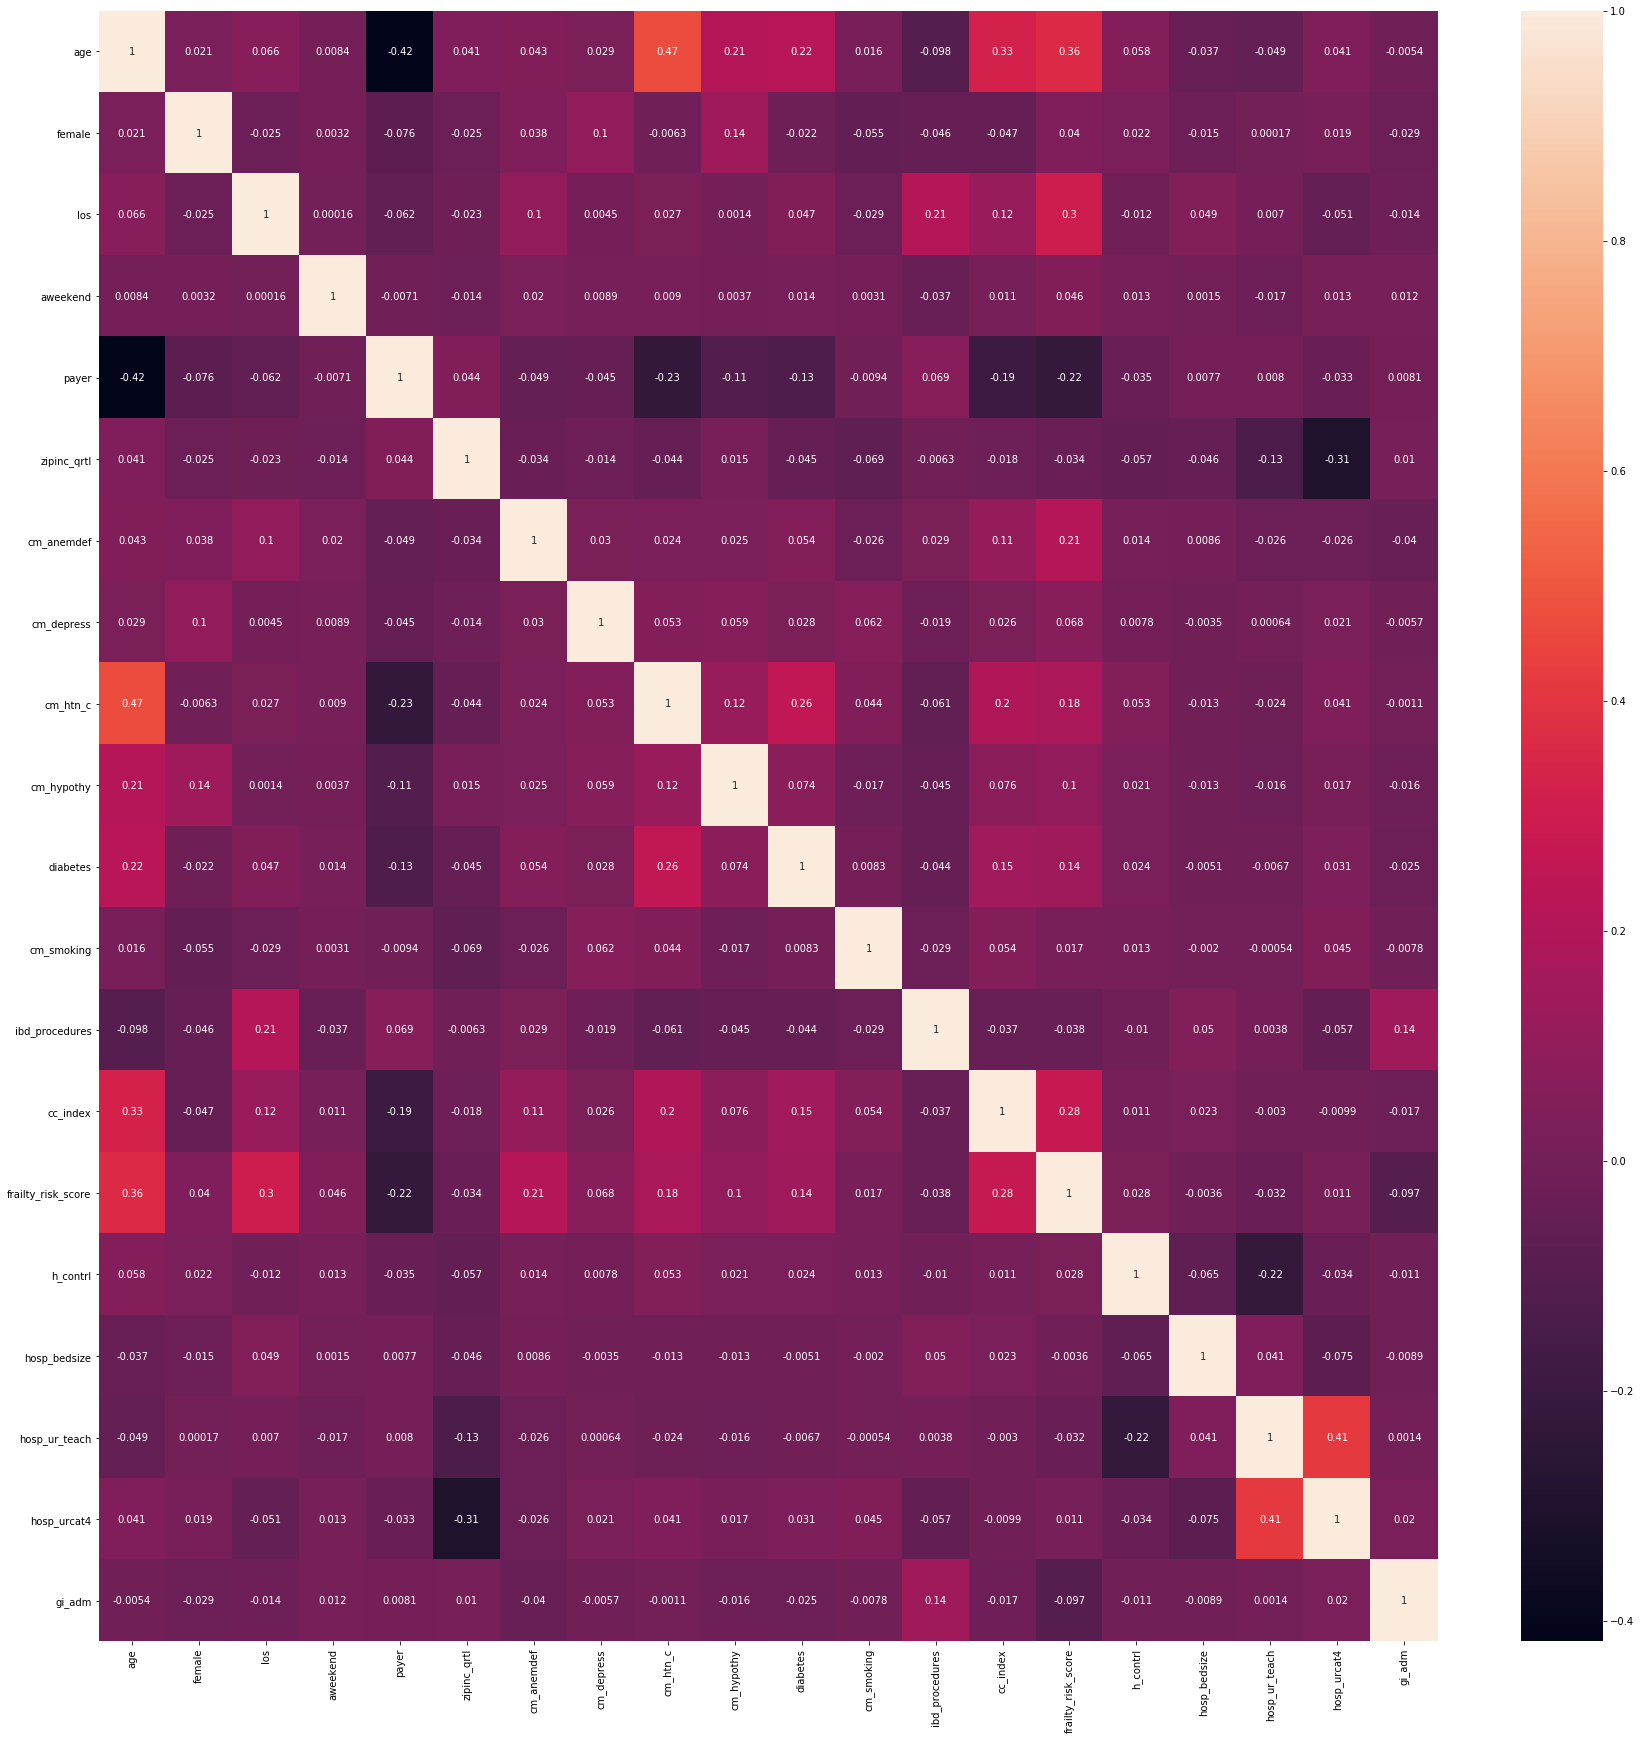

In [271]:
# Correlation matrix
corrMatrix = data.corr()

# Generating a heatmap
import seaborn as sn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30,100))   # Sample figsize in inches
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [319]:
# Grab outcome/label names after dropping na's/rows with na's
target = cleaned_data["ibd_readm"]
target_names = ["none", "readmitted"]
target = target.astype('int64')
target

0        1
3        0
4        1
9        0
10       0
        ..
94491    0
94492    0
94493    1
94496    0
94497    0
Name: ibd_readm, Length: 46632, dtype: int64

In [320]:
# Grab feature names after dropping na's/rows with na
cleaned_data_wo_outcome = cleaned_data.drop('ibd_readm', axis=1)
featured_names = cleaned_data_wo_outcome.columns
featured_names

Index(['age', 'frailty_risk_score', 'los', 'zipinc_qrtl', 'payer',
       'hosp_bedsize', 'h_contrl', 'hosp_urcat4', 'hosp_ur_teach', 'cc_index',
       'female', 'cm_htn_c', 'ibd_procedures', 'cm_smoking', 'aweekend',
       'ibd_specific_adm', 'diabetes', 'cm_depress', 'orproc', 'thromboses'],
      dtype='object')

In [321]:
# Check for na values
cleaned_data_wo_outcome.isnull().sum()

age                   0
frailty_risk_score    0
los                   0
zipinc_qrtl           0
payer                 0
hosp_bedsize          0
h_contrl              0
hosp_urcat4           0
hosp_ur_teach         0
cc_index              0
female                0
cm_htn_c              0
ibd_procedures        0
cm_smoking            0
aweekend              0
ibd_specific_adm      0
diabetes              0
cm_depress            0
orproc                0
thromboses            0
dtype: int64

In [322]:
# Set up training and testing datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_data_wo_outcome, target, random_state=42)

In [323]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, max_depth=10)
rf.fit(X_train, y_train)

print(f'Training Score: {rf.score(X_train, y_train)}')
print(f'Testing Score: {rf.score(X_test, y_test)}')

Training Score: 0.703636987476411
Testing Score: 0.620861211185452


In [324]:
# Hypertuning parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 150, 200],
              'max_depth': [5, 10, 15]}
grid = GridSearchCV(rf,param_grid, verbose=3)

In [325]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=5, n_estimators=50 ....................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] ........ max_depth=5, n_estimators=50, score=0.597, total=   1.2s
[CV] max_depth=5, n_estimators=50 ....................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[CV] ........ max_depth=5, n_estimators=50, score=0.603, total=   0.9s
[CV] max_depth=5, n_estimators=50 ....................................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s
[CV] ........ max_depth=5, n_estimators=50, score=0.598, total=   1.0s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ........ max_depth=5, n_estimators=50, score=0.603, total=   0.9s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ........ max_depth=5, n_estimators=50, score=0.600, to

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False,
                                              rand

In [326]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 10, 'n_estimators': 150}
0.6114541801683174


In [327]:
# Check the training and testing scores
print(f'Training Score: {grid.score(X_train, y_train)}')
grid.predict(X_test)
print(f'Testing Score: {grid.score(X_test, y_test)}')

Training Score: 0.7037227654829302
Testing Score: 0.622147881283239


In [328]:
# Check the feature importance
sorted(zip(rf.feature_importances_, X_train), reverse=True)

[(0.15574767155721625, 'los'),
 (0.14326361915609487, 'frailty_risk_score'),
 (0.13939886819112518, 'age'),
 (0.0903841839102007, 'cc_index'),
 (0.08598435449659507, 'payer'),
 (0.043492936015643135, 'orproc'),
 (0.03901249522629613, 'zipinc_qrtl'),
 (0.030735458346282593, 'hosp_urcat4'),
 (0.02900268857008976, 'h_contrl'),
 (0.027976214866629497, 'ibd_procedures'),
 (0.02785374624090575, 'hosp_bedsize'),
 (0.02570992518092278, 'hosp_ur_teach'),
 (0.02474329802088012, 'ibd_specific_adm'),
 (0.021736494862153843, 'thromboses'),
 (0.02039304119736637, 'female'),
 (0.02030321236452625, 'diabetes'),
 (0.019438014694894045, 'cm_depress'),
 (0.01918665071989119, 'cm_smoking'),
 (0.01863985199678427, 'cm_htn_c'),
 (0.016997274385502137, 'aweekend')]